# Import Libraries & Load Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("Dataset.csv")  # Replace with your dataset file name

# Check columns
print("✅ Dataset Loaded Successfully!")
print(df.columns)


✅ Dataset Loaded Successfully!
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


# Most Common Price Range

1️⃣ Most Common Price Range

✅ Most common price range is: 1

Distribution of Price Ranges:
 Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


C:\Users\aditya tiwari\AppData\Local\Temp\ipykernel_11744\1982430468.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_counts.index, y=price_counts.values, palette='viridis')


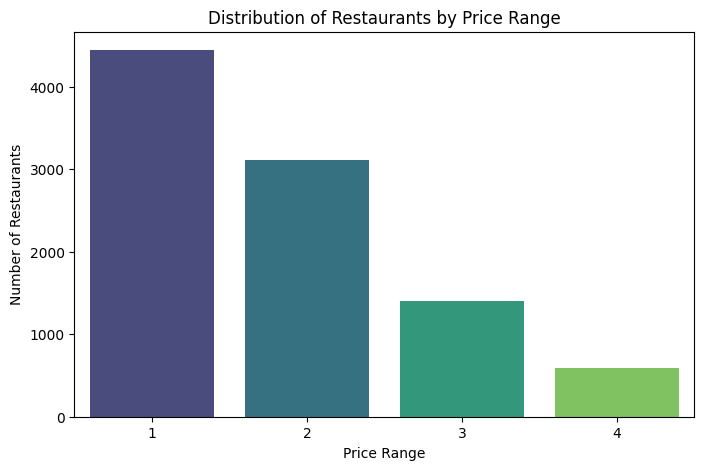

In [3]:
# --- Most Common Price Range ---
print("="*60)
print("1️⃣ Most Common Price Range")

if 'Price range' in df.columns:
    price_counts = df['Price range'].value_counts().sort_index()
    most_common_price = df['Price range'].mode()[0]
    print(f"\n✅ Most common price range is: {most_common_price}")
    print("\nDistribution of Price Ranges:\n", price_counts)
    
    # Plot Distribution
    plt.figure(figsize=(8,5))
    sns.barplot(x=price_counts.index, y=price_counts.values, palette='viridis')
    plt.title('Distribution of Restaurants by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel('Number of Restaurants')
    plt.show()
else:
    print("❌ 'Price range' column not found in dataset.")


# Average Rating per Price Range


2️⃣ Average Rating per Price Range

✅ Average Ratings for each Price Range:

   Price range  Aggregate rating
3            4              3.82
2            3              3.68
1            2              2.94
0            1              2.00


C:\Users\aditya tiwari\AppData\Local\Temp\ipykernel_11744\617411359.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating_price, x='Price range', y='Aggregate rating', palette='coolwarm')


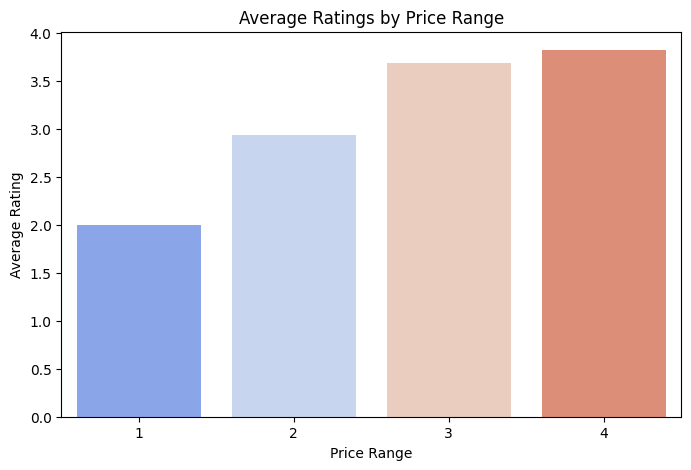

In [4]:
# --- Average Rating per Price Range ---
print("\n" + "="*60)
print("2️⃣ Average Rating per Price Range")

if 'Price range' in df.columns and 'Aggregate rating' in df.columns:
    avg_rating_price = df.groupby('Price range')['Aggregate rating'].mean().round(2).reset_index()
    avg_rating_price = avg_rating_price.sort_values(by='Aggregate rating', ascending=False)
    
    print("\n✅ Average Ratings for each Price Range:\n")
    print(avg_rating_price)
    
    # Plot Average Ratings
    plt.figure(figsize=(8,5))
    sns.barplot(data=avg_rating_price, x='Price range', y='Aggregate rating', palette='coolwarm')
    plt.title('Average Ratings by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel('Average Rating')
    plt.show()
else:
    print("❌ 'Price range' and 'Aggregate rating' columns not found in dataset.")


# Color Representation for Highest Average Rating

In [5]:
# --- Color Representation for Highest Average Rating ---
print("\n" + "="*60)
print("3️⃣ Color Representation for Highest Average Rating")

# Define a color mapping function
def get_color(rating):
    if rating >= 4:
        return 'Green'
    elif rating >= 3:
        return 'Yellow'
    elif rating >= 2:
        return 'Orange'
    else:
        return 'Red'

# Add Color Column
avg_rating_price['Color'] = avg_rating_price['Aggregate rating'].apply(get_color)

# Find Highest Rating Price Range
highest = avg_rating_price.iloc[0]
print(f"\n✅ Price Range with Highest Average Rating: {int(highest['Price range'])}")
print(f"✅ Average Rating: {highest['Aggregate rating']}")
print(f"✅ Color Representation: {highest['Color']}")

# Show the DataFrame
print("\nFull Table with Colors:\n", avg_rating_price)



3️⃣ Color Representation for Highest Average Rating

✅ Price Range with Highest Average Rating: 4
✅ Average Rating: 3.82
✅ Color Representation: Yellow

Full Table with Colors:
    Price range  Aggregate rating   Color
3            4              3.82  Yellow
2            3              3.68  Yellow
1            2              2.94  Orange
0            1              2.00  Orange


# Color-coded Bar Chart for Insights

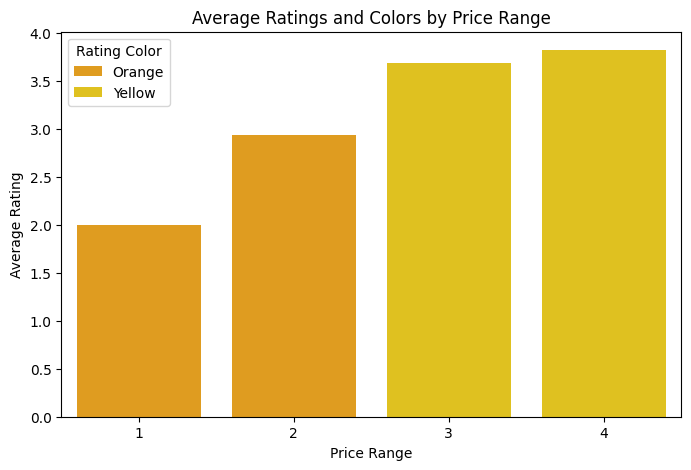

In [6]:
# --- Color-coded Bar Chart ---
plt.figure(figsize=(8,5))
sns.barplot(data=avg_rating_price, x='Price range', y='Aggregate rating', hue='Color', dodge=False, 
            palette={'Green':'green','Yellow':'gold','Orange':'orange','Red':'red'})
plt.title('Average Ratings and Colors by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.legend(title='Rating Color')
plt.show()
